In [1]:
import sys
import os
module_path = os.path.abspath('/media/jary/DATA/Uni/tesi/codice')

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from networks import NoKafnet, Kafnet
import utils.datasetsUtils.CIFAR as CIFAR
from utils.datasetsUtils.taskManager import IncrementalTaskClassification, NoTask
import configs.configClasses as configClasses
from torchvision.transforms import transforms
import torch
import networks.continual_learning as continual_learning
import networks.continual_learning_beta as continual_learning_beta

from Trainer import Trainer
import matplotlib.pyplot as plt
from collections import defaultdict
from copy import deepcopy
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [3]:
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)

In [4]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

True
1
GeForce GTX 1050


In [5]:
config = configClasses.DefaultConfig()
config.L1_REG = 0
config.EPOCHS = 20
config.SAVE_PATH = './models/sit_tecnique_comparison'
config.IS_CONVOLUTIONAL = True
config.USE_CL = False
config.MODEL_NAME = ''
config.NEXT_TASK_EPOCHS = None
config.NEXT_TASK_LR = None
config.OPTIMIZER = 'Adam'
# config.DEVICE = 'cpu'
print(config)

CONFIG PARAMETERS
BATCH_SIZE: 64
CL_PAR: {'sample_size': 250, 'penalty_importance': 1000.0}
CL_TEC: <class 'networks.continual_learning.EWC'>
DEVICE: cuda
EPOCHS: 20
IS_CONVOLUTIONAL: True
IS_INCREMENTAL: False
ITERS: 1
L1_REG: 0
LOSS: cross_entropy
LR: 0.001
MODEL_NAME: 
NEXT_TASK_EPOCHS: None
NEXT_TASK_LR: None
OPTIMIZER: Adam
RUN_NAME: default
SAVE_PATH: ./models/sit_tecnique_comparison
USE_CL: False
USE_TENSORBOARD: True



In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]
)

dataset = CIFAR.Cifar100('../data/cifar100', download=True, transform=transform, 
                        task_manager=IncrementalTaskClassification(10),
                        force_download=False, train_split=0.8, target_transform=None)
dataset.load_dataset()
print(len(dataset.Y))

../data/cifar100/download
60000


In [7]:
results = []
net = NoKafnet.synCNN(100, incremental=True)
experiments = [('no_cont_learning', None),
#                ('ewc', continual_learning.OnlineEWC),
               ('gem', continual_learning.GEM),]
#                ('embedding', continual_learning_beta.embedding)]

In [8]:
for name, tec in experiments:
    print(name)
    
    n = deepcopy(net)
    c = deepcopy(config)
    
    c.MODEL_NAME = name

    if name == 'gem':
        c.CL_PAR['margin'] = 0.5
        c.CL_PAR['sample_size'] = 100
        c.USE_CL = True
        c.IS_INCREMENTAL = True
    elif name == 'ewc':
        c.CL_PAR['penalty_importance'] = 1e6
        c.USE_CL = True
        c.IS_INCREMENTAL = True
    elif name == 'embedding':
        c.CL_PAR['penalty_importance'] = 1
        c.CL_PAR['sample_size'] = 50
        c.CL_PAR['weights_type'] = 'distance'
        c.USE_CL = True
        c.IS_INCREMENTAL = True
        
    c.CL_TEC = tec
    trainer = Trainer(n, deepcopy(dataset), c, save_modality=2, verbose=True, pretrained_model='./models/completi/nokaf')

    r = trainer.load()
    if not r:
        r = trainer.all_tasks()
    print(r)
    results.append((c.MODEL_NAME, r))
    
    del trainer
    del n

no_cont_learning


Training task 0, epoch 1: 100%|██████████| 75/75 [00:02<00:00, 36.88it/s, loss=4.28, batch#=75]
Current task: 0, evaluated task 0: 19it [00:00, 64.19it/s, batch#=19]
Training task 0, epoch 2: 100%|██████████| 75/75 [00:01<00:00, 39.72it/s, loss=4.19, batch#=75]
Current task: 0, evaluated task 0: 19it [00:00, 64.95it/s, batch#=19]
Training task 0, epoch 3: 100%|██████████| 75/75 [00:01<00:00, 39.89it/s, loss=4.18, batch#=75]
Current task: 0, evaluated task 0: 19it [00:00, 63.84it/s, batch#=19]
Training task 0, epoch 4: 100%|██████████| 75/75 [00:01<00:00, 39.47it/s, loss=4.16, batch#=75]
Current task: 0, evaluated task 0: 19it [00:00, 62.91it/s, batch#=19]
Training task 0, epoch 5: 100%|██████████| 75/75 [00:01<00:00, 39.24it/s, loss=4.17, batch#=75]
Current task: 0, evaluated task 0: 19it [00:00, 63.13it/s, batch#=19]
Training task 0, epoch 6: 100%|██████████| 75/75 [00:01<00:00, 39.23it/s, loss=4.16, batch#=75]
Current task: 0, evaluated task 0: 19it [00:00, 64.71it/s, batch#=19]
Trai

Current task: 1, evaluated task 0: 19it [00:00, 68.83it/s, batch#=19]
Training task 1, epoch 19: 100%|██████████| 75/75 [00:01<00:00, 41.20it/s, loss=4.58, batch#=75]
Current task: 1, evaluated task 1: 19it [00:00, 68.15it/s, batch#=19]
Current task: 1, evaluated task 0: 19it [00:00, 68.32it/s, batch#=19]
Training task 1, epoch 20: 100%|██████████| 75/75 [00:01<00:00, 39.85it/s, loss=4.58, batch#=75]
Current task: 1, evaluated task 1: 19it [00:00, 65.48it/s, batch#=19]
Current task: 1, evaluated task 0: 19it [00:00, 66.85it/s, batch#=19]
Current task: 1, evaluated task 2: 19it [00:00, 61.22it/s, batch#=19]
Current task: 1, evaluated task 3: 19it [00:00, 63.50it/s, batch#=19]
Current task: 1, evaluated task 4: 19it [00:00, 63.90it/s, batch#=19]
Current task: 1, evaluated task 5: 19it [00:00, 66.32it/s, batch#=19]
Current task: 1, evaluated task 6: 19it [00:00, 62.00it/s, batch#=19]
Current task: 1, evaluated task 7: 19it [00:00, 66.44it/s, batch#=19]
Current task: 1, evaluated task 8: 1

Training task 3, epoch 2: 100%|██████████| 75/75 [00:01<00:00, 40.47it/s, loss=4.56, batch#=75]
Current task: 3, evaluated task 3: 19it [00:00, 66.34it/s, batch#=19]
Current task: 3, evaluated task 0: 19it [00:00, 65.90it/s, batch#=19]
Current task: 3, evaluated task 1: 19it [00:00, 68.13it/s, batch#=19]
Current task: 3, evaluated task 2: 19it [00:00, 65.29it/s, batch#=19]
Training task 3, epoch 3: 100%|██████████| 75/75 [00:01<00:00, 40.09it/s, loss=4.56, batch#=75]
Current task: 3, evaluated task 3: 19it [00:00, 65.58it/s, batch#=19]
Current task: 3, evaluated task 0: 19it [00:00, 67.16it/s, batch#=19]
Current task: 3, evaluated task 1: 19it [00:00, 65.63it/s, batch#=19]
Current task: 3, evaluated task 2: 19it [00:00, 66.09it/s, batch#=19]
Training task 3, epoch 4: 100%|██████████| 75/75 [00:01<00:00, 40.64it/s, loss=4.56, batch#=75]
Current task: 3, evaluated task 3: 19it [00:00, 64.18it/s, batch#=19]
Current task: 3, evaluated task 0: 19it [00:00, 66.64it/s, batch#=19]
Current task

Current task: 4, evaluated task 0: 19it [00:00, 66.78it/s, batch#=19]
Current task: 4, evaluated task 1: 19it [00:00, 64.32it/s, batch#=19]
Current task: 4, evaluated task 2: 19it [00:00, 65.41it/s, batch#=19]
Current task: 4, evaluated task 3: 19it [00:00, 64.12it/s, batch#=19]
Training task 4, epoch 3: 100%|██████████| 75/75 [00:01<00:00, 39.46it/s, loss=4.55, batch#=75]
Current task: 4, evaluated task 4: 19it [00:00, 63.58it/s, batch#=19]
Current task: 4, evaluated task 0: 19it [00:00, 63.34it/s, batch#=19]
Current task: 4, evaluated task 1: 19it [00:00, 63.12it/s, batch#=19]
Current task: 4, evaluated task 2: 19it [00:00, 63.73it/s, batch#=19]
Current task: 4, evaluated task 3: 19it [00:00, 66.79it/s, batch#=19]
Training task 4, epoch 4: 100%|██████████| 75/75 [00:01<00:00, 39.82it/s, loss=4.55, batch#=75]
Current task: 4, evaluated task 4: 19it [00:00, 66.02it/s, batch#=19]
Current task: 4, evaluated task 0: 19it [00:00, 64.20it/s, batch#=19]
Current task: 4, evaluated task 1: 19i

Current task: 4, evaluated task 2: 19it [00:00, 67.58it/s, batch#=19]
Current task: 4, evaluated task 3: 19it [00:00, 66.50it/s, batch#=19]
Current task: 4, evaluated task 5: 19it [00:00, 65.57it/s, batch#=19]
Current task: 4, evaluated task 6: 19it [00:00, 66.94it/s, batch#=19]
Current task: 4, evaluated task 7: 19it [00:00, 61.86it/s, batch#=19]
Current task: 4, evaluated task 8: 19it [00:00, 65.67it/s, batch#=19]
Current task: 4, evaluated task 9: 19it [00:00, 63.24it/s, batch#=19]
Training task 5, epoch 1: 100%|██████████| 75/75 [00:01<00:00, 40.07it/s, loss=4.54, batch#=75]
Current task: 5, evaluated task 5: 19it [00:00, 67.56it/s, batch#=19]
Current task: 5, evaluated task 0: 19it [00:00, 66.79it/s, batch#=19]
Current task: 5, evaluated task 1: 19it [00:00, 64.85it/s, batch#=19]
Current task: 5, evaluated task 2: 19it [00:00, 66.86it/s, batch#=19]
Current task: 5, evaluated task 3: 19it [00:00, 63.76it/s, batch#=19]
Current task: 5, evaluated task 4: 19it [00:00, 66.41it/s, batch

Current task: 5, evaluated task 4: 19it [00:00, 53.15it/s, batch#=19]
Training task 5, epoch 16: 100%|██████████| 75/75 [00:02<00:00, 35.94it/s, loss=4.54, batch#=75]
Current task: 5, evaluated task 5: 19it [00:00, 51.57it/s, batch#=19]
Current task: 5, evaluated task 0: 19it [00:00, 51.89it/s, batch#=19]
Current task: 5, evaluated task 1: 19it [00:00, 52.98it/s, batch#=19]
Current task: 5, evaluated task 2: 19it [00:00, 56.45it/s, batch#=19]
Current task: 5, evaluated task 3: 19it [00:00, 57.16it/s, batch#=19]
Current task: 5, evaluated task 4: 19it [00:00, 59.76it/s, batch#=19]
Training task 5, epoch 17: 100%|██████████| 75/75 [00:02<00:00, 37.45it/s, loss=4.54, batch#=75]
Current task: 5, evaluated task 5: 19it [00:00, 58.43it/s, batch#=19]
Current task: 5, evaluated task 0: 19it [00:00, 63.83it/s, batch#=19]
Current task: 5, evaluated task 1: 19it [00:00, 60.79it/s, batch#=19]
Current task: 5, evaluated task 2: 19it [00:00, 61.52it/s, batch#=19]
Current task: 5, evaluated task 3: 1

Current task: 6, evaluated task 5: 19it [00:00, 65.50it/s, batch#=19]
Training task 6, epoch 10: 100%|██████████| 75/75 [00:01<00:00, 39.43it/s, loss=4.53, batch#=75]
Current task: 6, evaluated task 6: 19it [00:00, 66.47it/s, batch#=19]
Current task: 6, evaluated task 0: 19it [00:00, 63.61it/s, batch#=19]
Current task: 6, evaluated task 1: 19it [00:00, 64.50it/s, batch#=19]
Current task: 6, evaluated task 2: 19it [00:00, 67.06it/s, batch#=19]
Current task: 6, evaluated task 3: 19it [00:00, 65.37it/s, batch#=19]
Current task: 6, evaluated task 4: 19it [00:00, 62.43it/s, batch#=19]
Current task: 6, evaluated task 5: 19it [00:00, 64.47it/s, batch#=19]
Training task 6, epoch 11: 100%|██████████| 75/75 [00:01<00:00, 40.06it/s, loss=4.53, batch#=75]
Current task: 6, evaluated task 6: 19it [00:00, 68.10it/s, batch#=19]
Current task: 6, evaluated task 0: 19it [00:00, 65.41it/s, batch#=19]
Current task: 6, evaluated task 1: 19it [00:00, 62.80it/s, batch#=19]
Current task: 6, evaluated task 2: 1

Current task: 7, evaluated task 7: 19it [00:00, 65.51it/s, batch#=19]
Current task: 7, evaluated task 0: 19it [00:00, 65.22it/s, batch#=19]
Current task: 7, evaluated task 1: 19it [00:00, 65.12it/s, batch#=19]
Current task: 7, evaluated task 2: 19it [00:00, 68.46it/s, batch#=19]
Current task: 7, evaluated task 3: 19it [00:00, 65.02it/s, batch#=19]
Current task: 7, evaluated task 4: 19it [00:00, 65.07it/s, batch#=19]
Current task: 7, evaluated task 5: 19it [00:00, 65.83it/s, batch#=19]
Current task: 7, evaluated task 6: 19it [00:00, 63.78it/s, batch#=19]
Training task 7, epoch 4: 100%|██████████| 75/75 [00:01<00:00, 40.50it/s, loss=4.52, batch#=75]
Current task: 7, evaluated task 7: 19it [00:00, 61.03it/s, batch#=19]
Current task: 7, evaluated task 0: 19it [00:00, 64.88it/s, batch#=19]
Current task: 7, evaluated task 1: 19it [00:00, 61.35it/s, batch#=19]
Current task: 7, evaluated task 2: 19it [00:00, 62.03it/s, batch#=19]
Current task: 7, evaluated task 3: 19it [00:00, 65.72it/s, batch

Current task: 7, evaluated task 3: 19it [00:00, 67.01it/s, batch#=19]
Current task: 7, evaluated task 4: 19it [00:00, 63.58it/s, batch#=19]
Current task: 7, evaluated task 5: 19it [00:00, 62.88it/s, batch#=19]
Current task: 7, evaluated task 6: 19it [00:00, 65.99it/s, batch#=19]
Training task 7, epoch 16: 100%|██████████| 75/75 [00:01<00:00, 40.17it/s, loss=4.52, batch#=75]
Current task: 7, evaluated task 7: 19it [00:00, 64.70it/s, batch#=19]
Current task: 7, evaluated task 0: 19it [00:00, 67.65it/s, batch#=19]
Current task: 7, evaluated task 1: 19it [00:00, 62.70it/s, batch#=19]
Current task: 7, evaluated task 2: 19it [00:00, 66.23it/s, batch#=19]
Current task: 7, evaluated task 3: 19it [00:00, 65.74it/s, batch#=19]
Current task: 7, evaluated task 4: 19it [00:00, 65.27it/s, batch#=19]
Current task: 7, evaluated task 5: 19it [00:00, 64.47it/s, batch#=19]
Current task: 7, evaluated task 6: 19it [00:00, 65.39it/s, batch#=19]
Training task 7, epoch 17: 100%|██████████| 75/75 [00:01<00:00,

Current task: 8, evaluated task 8: 19it [00:00, 58.51it/s, batch#=19]
Current task: 8, evaluated task 0: 19it [00:00, 55.80it/s, batch#=19]
Current task: 8, evaluated task 1: 19it [00:00, 61.70it/s, batch#=19]
Current task: 8, evaluated task 2: 19it [00:00, 55.34it/s, batch#=19]
Current task: 8, evaluated task 3: 19it [00:00, 58.35it/s, batch#=19]
Current task: 8, evaluated task 4: 19it [00:00, 55.59it/s, batch#=19]
Current task: 8, evaluated task 5: 19it [00:00, 56.85it/s, batch#=19]
Current task: 8, evaluated task 6: 19it [00:00, 55.35it/s, batch#=19]
Current task: 8, evaluated task 7: 19it [00:00, 57.41it/s, batch#=19]
Training task 8, epoch 8: 100%|██████████| 75/75 [00:02<00:00, 35.65it/s, loss=4.51, batch#=75]
Current task: 8, evaluated task 8: 19it [00:00, 59.39it/s, batch#=19]
Current task: 8, evaluated task 0: 19it [00:00, 61.67it/s, batch#=19]
Current task: 8, evaluated task 1: 19it [00:00, 65.57it/s, batch#=19]
Current task: 8, evaluated task 2: 19it [00:00, 67.07it/s, batch

Current task: 8, evaluated task 1: 19it [00:00, 63.40it/s, batch#=19]
Current task: 8, evaluated task 2: 19it [00:00, 62.76it/s, batch#=19]
Current task: 8, evaluated task 3: 19it [00:00, 63.85it/s, batch#=19]
Current task: 8, evaluated task 4: 19it [00:00, 63.45it/s, batch#=19]
Current task: 8, evaluated task 5: 19it [00:00, 67.32it/s, batch#=19]
Current task: 8, evaluated task 6: 19it [00:00, 63.67it/s, batch#=19]
Current task: 8, evaluated task 7: 19it [00:00, 66.82it/s, batch#=19]
Training task 8, epoch 19: 100%|██████████| 75/75 [00:01<00:00, 40.03it/s, loss=4.51, batch#=75]
Current task: 8, evaluated task 8: 19it [00:00, 66.51it/s, batch#=19]
Current task: 8, evaluated task 0: 19it [00:00, 63.23it/s, batch#=19]
Current task: 8, evaluated task 1: 19it [00:00, 66.42it/s, batch#=19]
Current task: 8, evaluated task 2: 19it [00:00, 67.69it/s, batch#=19]
Current task: 8, evaluated task 3: 19it [00:00, 67.79it/s, batch#=19]
Current task: 8, evaluated task 4: 19it [00:00, 66.13it/s, batc

Current task: 9, evaluated task 6: 19it [00:00, 65.61it/s, batch#=19]
Current task: 9, evaluated task 7: 19it [00:00, 59.88it/s, batch#=19]
Current task: 9, evaluated task 8: 19it [00:00, 65.61it/s, batch#=19]
Training task 9, epoch 9: 100%|██████████| 75/75 [00:01<00:00, 39.78it/s, loss=4.5, batch#=75]
Current task: 9, evaluated task 9: 19it [00:00, 65.64it/s, batch#=19]
Current task: 9, evaluated task 0: 19it [00:00, 67.76it/s, batch#=19]
Current task: 9, evaluated task 1: 19it [00:00, 63.82it/s, batch#=19]
Current task: 9, evaluated task 2: 19it [00:00, 63.08it/s, batch#=19]
Current task: 9, evaluated task 3: 19it [00:00, 65.23it/s, batch#=19]
Current task: 9, evaluated task 4: 19it [00:00, 67.73it/s, batch#=19]
Current task: 9, evaluated task 5: 19it [00:00, 64.64it/s, batch#=19]
Current task: 9, evaluated task 6: 19it [00:00, 66.51it/s, batch#=19]
Current task: 9, evaluated task 7: 19it [00:00, 65.48it/s, batch#=19]
Current task: 9, evaluated task 8: 19it [00:00, 63.99it/s, batch#

Training task 9, epoch 19: 100%|██████████| 75/75 [00:01<00:00, 40.46it/s, loss=4.5, batch#=75]
Current task: 9, evaluated task 9: 19it [00:00, 65.76it/s, batch#=19]
Current task: 9, evaluated task 0: 19it [00:00, 66.42it/s, batch#=19]
Current task: 9, evaluated task 1: 19it [00:00, 67.78it/s, batch#=19]
Current task: 9, evaluated task 2: 19it [00:00, 65.42it/s, batch#=19]
Current task: 9, evaluated task 3: 19it [00:00, 65.73it/s, batch#=19]
Current task: 9, evaluated task 4: 19it [00:00, 64.77it/s, batch#=19]
Current task: 9, evaluated task 5: 19it [00:00, 66.82it/s, batch#=19]
Current task: 9, evaluated task 6: 19it [00:00, 65.61it/s, batch#=19]
Current task: 9, evaluated task 7: 19it [00:00, 66.59it/s, batch#=19]
Current task: 9, evaluated task 8: 19it [00:00, 66.61it/s, batch#=19]
Training task 9, epoch 20: 100%|██████████| 75/75 [00:01<00:00, 40.66it/s, loss=4.5, batch#=75]
Current task: 9, evaluated task 9: 19it [00:00, 65.96it/s, batch#=19]
Current task: 9, evaluated task 0: 19i

{'metrics': {'fwt': 0.002185185185185185, 'bwt': -0.018999999999999996, 'remembering': 0.981, 'pbwt': 0, 'accuracy': 0.018363636363636363}, 'tasks': {'0': {'f1': [0.09666666666666666, 0.095, 0.09416666666666666, 0.09666666666666666, 0.09666666666666666, 0.09583333333333334, 0.09416666666666666, 0.09416666666666666, 0.09583333333333334, 0.0925, 0.09583333333333334, 0.09416666666666666, 0.09166666666666666, 0.095, 0.09166666666666666, 0.09416666666666666, 0.0875, 0.0925, 0.09416666666666666, 0.095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008333333333333335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Training task (GEM) 0, epoch 1: 100%|██████████| 75/75 [00:01<00:00, 40.39it/s, loss=1.6, batch#=75] 
Current task: 0, evaluated task 0: 19it [00:00, 66.01it/s, batch#=19]
Training task (GEM) 0, epoch 2: 100%|██████████| 75/75 [00:01<00:00, 40.09it/s, loss=0.884, batch#=75]
Current task: 0, evaluated task 0: 19it [00:00, 63.27it/s, batch#=19]
Training task (GEM) 0, epoch 3: 100%|██████████| 75/75 [00:01<00:00, 39.93it/s, loss=0.694, batch#=75]
Current task: 0, evaluated task 0: 19it [00:00, 67.84it/s, batch#=19]
Training task (GEM) 0, epoch 4: 100%|██████████| 75/75 [00:01<00:00, 39.83it/s, loss=0.589, batch#=75]
Current task: 0, evaluated task 0: 19it [00:00, 66.41it/s, batch#=19]
Training task (GEM) 0, epoch 5: 100%|██████████| 75/75 [00:01<00:00, 40.08it/s, loss=0.512, batch#=75]
Current task: 0, evaluated task 0: 19it [00:00, 64.34it/s, batch#=19]
Training task (GEM) 0, epoch 6: 100%|██████████| 75/75 [00:01<00:00, 40.12it/s, loss=0.436, batch#=75]
Current task: 0, evaluated task 0

Current task: 1, evaluated task 0: 19it [00:00, 67.98it/s, batch#=19]
Training task (GEM) 1, epoch 18: 100%|██████████| 75/75 [00:05<00:00, 13.97it/s, loss=0.115, batch#=75]
Current task: 1, evaluated task 1: 19it [00:00, 57.21it/s, batch#=19]
Current task: 1, evaluated task 0: 19it [00:00, 64.43it/s, batch#=19]
Training task (GEM) 1, epoch 19: 100%|██████████| 75/75 [00:05<00:00, 14.00it/s, loss=0.103, batch#=75]
Current task: 1, evaluated task 1: 19it [00:00, 58.99it/s, batch#=19]
Current task: 1, evaluated task 0: 19it [00:00, 59.20it/s, batch#=19]
Training task (GEM) 1, epoch 20: 100%|██████████| 75/75 [00:05<00:00, 13.91it/s, loss=0.0755, batch#=75]
Current task: 1, evaluated task 1: 19it [00:00, 51.82it/s, batch#=19]
Current task: 1, evaluated task 0: 19it [00:00, 66.13it/s, batch#=19]
Current task: 1, evaluated task 2: 19it [00:00, 61.58it/s, batch#=19]
Current task: 1, evaluated task 3: 19it [00:00, 65.16it/s, batch#=19]
Current task: 1, evaluated task 4: 19it [00:00, 63.81it/s

Training task (GEM) 3, epoch 1: 100%|██████████| 75/75 [00:08<00:00,  8.87it/s, loss=3.04, batch#=75]
Current task: 3, evaluated task 3: 19it [00:00, 71.64it/s, batch#=19]
Current task: 3, evaluated task 0: 19it [00:00, 72.71it/s, batch#=19]
Current task: 3, evaluated task 1: 19it [00:00, 73.49it/s, batch#=19]
Current task: 3, evaluated task 2: 19it [00:00, 72.95it/s, batch#=19]
Training task (GEM) 3, epoch 2: 100%|██████████| 75/75 [00:08<00:00,  8.90it/s, loss=1.01, batch#=75] 
Current task: 3, evaluated task 3: 19it [00:00, 70.34it/s, batch#=19]
Current task: 3, evaluated task 0: 19it [00:00, 74.91it/s, batch#=19]
Current task: 3, evaluated task 1: 19it [00:00, 75.78it/s, batch#=19]
Current task: 3, evaluated task 2: 19it [00:00, 73.74it/s, batch#=19]
Training task (GEM) 3, epoch 3: 100%|██████████| 75/75 [00:08<00:00,  8.93it/s, loss=0.522, batch#=75]
Current task: 3, evaluated task 3: 19it [00:00, 72.21it/s, batch#=19]
Current task: 3, evaluated task 0: 19it [00:00, 73.62it/s, bat

Training task (GEM) 4, epoch 1: 100%|██████████| 75/75 [00:10<00:00,  7.41it/s, loss=3.1, batch#=75] 
Current task: 4, evaluated task 4: 19it [00:00, 70.51it/s, batch#=19]
Current task: 4, evaluated task 0: 19it [00:00, 75.50it/s, batch#=19]
Current task: 4, evaluated task 1: 19it [00:00, 75.27it/s, batch#=19]
Current task: 4, evaluated task 2: 19it [00:00, 74.28it/s, batch#=19]
Current task: 4, evaluated task 3: 19it [00:00, 74.75it/s, batch#=19]
Training task (GEM) 4, epoch 2: 100%|██████████| 75/75 [00:10<00:00,  7.39it/s, loss=0.778, batch#=75]
Current task: 4, evaluated task 4: 19it [00:00, 71.81it/s, batch#=19]
Current task: 4, evaluated task 0: 19it [00:00, 74.39it/s, batch#=19]
Current task: 4, evaluated task 1: 19it [00:00, 75.70it/s, batch#=19]
Current task: 4, evaluated task 2: 19it [00:00, 74.34it/s, batch#=19]
Current task: 4, evaluated task 3: 19it [00:00, 75.70it/s, batch#=19]
Training task (GEM) 4, epoch 3: 100%|██████████| 75/75 [00:10<00:00,  7.36it/s, loss=0.372, bat

Training task (GEM) 4, epoch 19: 100%|██████████| 75/75 [00:10<00:00,  6.91it/s, loss=0.0521, batch#=75]
Current task: 4, evaluated task 4: 19it [00:00, 70.92it/s, batch#=19]
Current task: 4, evaluated task 0: 19it [00:00, 72.28it/s, batch#=19]
Current task: 4, evaluated task 1: 19it [00:00, 71.84it/s, batch#=19]
Current task: 4, evaluated task 2: 19it [00:00, 72.42it/s, batch#=19]
Current task: 4, evaluated task 3: 19it [00:00, 72.49it/s, batch#=19]
Training task (GEM) 4, epoch 20: 100%|██████████| 75/75 [00:10<00:00,  7.01it/s, loss=0.0485, batch#=75]
Current task: 4, evaluated task 4: 19it [00:00, 70.31it/s, batch#=19]
Current task: 4, evaluated task 0: 19it [00:00, 73.77it/s, batch#=19]
Current task: 4, evaluated task 1: 19it [00:00, 72.79it/s, batch#=19]
Current task: 4, evaluated task 2: 19it [00:00, 73.68it/s, batch#=19]
Current task: 4, evaluated task 3: 19it [00:00, 74.10it/s, batch#=19]
Current task: 4, evaluated task 5: 19it [00:00, 74.28it/s, batch#=19]
Current task: 4, eva

Current task: 5, evaluated task 5: 19it [00:00, 71.79it/s, batch#=19]
Current task: 5, evaluated task 0: 19it [00:00, 73.15it/s, batch#=19]
Current task: 5, evaluated task 1: 19it [00:00, 74.01it/s, batch#=19]
Current task: 5, evaluated task 2: 19it [00:00, 74.16it/s, batch#=19]
Current task: 5, evaluated task 3: 19it [00:00, 74.04it/s, batch#=19]
Current task: 5, evaluated task 4: 19it [00:00, 74.24it/s, batch#=19]
Training task (GEM) 5, epoch 15: 100%|██████████| 75/75 [00:12<00:00,  5.96it/s, loss=0.0544, batch#=75]
Current task: 5, evaluated task 5: 19it [00:00, 70.32it/s, batch#=19]
Current task: 5, evaluated task 0: 19it [00:00, 72.93it/s, batch#=19]
Current task: 5, evaluated task 1: 19it [00:00, 73.36it/s, batch#=19]
Current task: 5, evaluated task 2: 19it [00:00, 74.77it/s, batch#=19]
Current task: 5, evaluated task 3: 19it [00:00, 74.51it/s, batch#=19]
Current task: 5, evaluated task 4: 19it [00:00, 74.21it/s, batch#=19]
Training task (GEM) 5, epoch 16: 100%|██████████| 75/75

Current task: 6, evaluated task 0: 19it [00:00, 60.90it/s, batch#=19]
Current task: 6, evaluated task 1: 19it [00:00, 65.81it/s, batch#=19]
Current task: 6, evaluated task 2: 19it [00:00, 64.93it/s, batch#=19]
Current task: 6, evaluated task 3: 19it [00:00, 72.74it/s, batch#=19]
Current task: 6, evaluated task 4: 19it [00:00, 60.26it/s, batch#=19]
Current task: 6, evaluated task 5: 19it [00:00, 67.53it/s, batch#=19]
Training task (GEM) 6, epoch 9: 100%|██████████| 75/75 [00:15<00:00,  4.72it/s, loss=0.038, batch#=75] 
Current task: 6, evaluated task 6: 19it [00:00, 58.70it/s, batch#=19]
Current task: 6, evaluated task 0: 19it [00:00, 59.58it/s, batch#=19]
Current task: 6, evaluated task 1: 19it [00:00, 59.16it/s, batch#=19]
Current task: 6, evaluated task 2: 19it [00:00, 58.55it/s, batch#=19]
Current task: 6, evaluated task 3: 19it [00:00, 58.53it/s, batch#=19]
Current task: 6, evaluated task 4: 19it [00:00, 59.92it/s, batch#=19]
Current task: 6, evaluated task 5: 19it [00:00, 59.37it/

Current task: 7, evaluated task 3: 19it [00:00, 59.56it/s, batch#=19]
Current task: 7, evaluated task 4: 19it [00:00, 59.61it/s, batch#=19]
Current task: 7, evaluated task 5: 19it [00:00, 58.28it/s, batch#=19]
Current task: 7, evaluated task 6: 19it [00:00, 51.09it/s, batch#=19]
Training task (GEM) 7, epoch 2: 100%|██████████| 75/75 [00:19<00:00,  3.54it/s, loss=1.02, batch#=75] 
Current task: 7, evaluated task 7: 19it [00:00, 52.22it/s, batch#=19]
Current task: 7, evaluated task 0: 19it [00:00, 54.34it/s, batch#=19]
Current task: 7, evaluated task 1: 19it [00:00, 56.71it/s, batch#=19]
Current task: 7, evaluated task 2: 19it [00:00, 57.03it/s, batch#=19]
Current task: 7, evaluated task 3: 19it [00:00, 55.26it/s, batch#=19]
Current task: 7, evaluated task 4: 19it [00:00, 58.88it/s, batch#=19]
Current task: 7, evaluated task 5: 19it [00:00, 58.88it/s, batch#=19]
Current task: 7, evaluated task 6: 19it [00:00, 59.19it/s, batch#=19]
Training task (GEM) 7, epoch 3: 100%|██████████| 75/75 [0

Current task: 7, evaluated task 6: 19it [00:00, 71.07it/s, batch#=19]
Training task (GEM) 7, epoch 14: 100%|██████████| 75/75 [00:17<00:00,  4.15it/s, loss=0.0457, batch#=75]
Current task: 7, evaluated task 7: 19it [00:00, 63.88it/s, batch#=19]
Current task: 7, evaluated task 0: 19it [00:00, 64.03it/s, batch#=19]
Current task: 7, evaluated task 1: 19it [00:00, 63.54it/s, batch#=19]
Current task: 7, evaluated task 2: 19it [00:00, 71.30it/s, batch#=19]
Current task: 7, evaluated task 3: 19it [00:00, 69.75it/s, batch#=19]
Current task: 7, evaluated task 4: 19it [00:00, 56.91it/s, batch#=19]
Current task: 7, evaluated task 5: 19it [00:00, 72.02it/s, batch#=19]
Current task: 7, evaluated task 6: 19it [00:00, 67.84it/s, batch#=19]
Training task (GEM) 7, epoch 15: 100%|██████████| 75/75 [00:17<00:00,  4.37it/s, loss=0.0652, batch#=75]
Current task: 7, evaluated task 7: 19it [00:00, 64.69it/s, batch#=19]
Current task: 7, evaluated task 0: 19it [00:00, 71.35it/s, batch#=19]
Current task: 7, eva

Current task: 8, evaluated task 3: 19it [00:00, 56.41it/s, batch#=19]
Current task: 8, evaluated task 4: 19it [00:00, 57.59it/s, batch#=19]
Current task: 8, evaluated task 5: 19it [00:00, 57.63it/s, batch#=19]
Current task: 8, evaluated task 6: 19it [00:00, 57.92it/s, batch#=19]
Current task: 8, evaluated task 7: 19it [00:00, 59.59it/s, batch#=19]
Training task (GEM) 8, epoch 6: 100%|██████████| 75/75 [00:22<00:00,  3.31it/s, loss=0.0614, batch#=75]
Current task: 8, evaluated task 8: 19it [00:00, 52.65it/s, batch#=19]
Current task: 8, evaluated task 0: 19it [00:00, 56.42it/s, batch#=19]
Current task: 8, evaluated task 1: 19it [00:00, 57.03it/s, batch#=19]
Current task: 8, evaluated task 2: 19it [00:00, 53.97it/s, batch#=19]
Current task: 8, evaluated task 3: 19it [00:00, 52.03it/s, batch#=19]
Current task: 8, evaluated task 4: 19it [00:00, 59.44it/s, batch#=19]
Current task: 8, evaluated task 5: 19it [00:00, 57.84it/s, batch#=19]
Current task: 8, evaluated task 6: 19it [00:00, 56.77it/

Current task: 8, evaluated task 4: 19it [00:00, 58.01it/s, batch#=19]
Current task: 8, evaluated task 5: 19it [00:00, 59.26it/s, batch#=19]
Current task: 8, evaluated task 6: 19it [00:00, 57.61it/s, batch#=19]
Current task: 8, evaluated task 7: 19it [00:00, 60.04it/s, batch#=19]
Training task (GEM) 8, epoch 17: 100%|██████████| 75/75 [00:21<00:00,  3.66it/s, loss=0.0566, batch#=75]
Current task: 8, evaluated task 8: 19it [00:00, 58.96it/s, batch#=19]
Current task: 8, evaluated task 0: 19it [00:00, 60.04it/s, batch#=19]
Current task: 8, evaluated task 1: 19it [00:00, 59.61it/s, batch#=19]
Current task: 8, evaluated task 2: 19it [00:00, 59.79it/s, batch#=19]
Current task: 8, evaluated task 3: 19it [00:00, 59.75it/s, batch#=19]
Current task: 8, evaluated task 4: 19it [00:00, 59.71it/s, batch#=19]
Current task: 8, evaluated task 5: 19it [00:00, 59.78it/s, batch#=19]
Current task: 8, evaluated task 6: 19it [00:00, 59.01it/s, batch#=19]
Current task: 8, evaluated task 7: 19it [00:00, 58.49it

Training task (GEM) 9, epoch 7: 100%|██████████| 75/75 [00:23<00:00,  3.27it/s, loss=0.0799, batch#=75]
Current task: 9, evaluated task 9: 19it [00:00, 58.50it/s, batch#=19]
Current task: 9, evaluated task 0: 19it [00:00, 58.69it/s, batch#=19]
Current task: 9, evaluated task 1: 19it [00:00, 58.83it/s, batch#=19]
Current task: 9, evaluated task 2: 19it [00:00, 59.66it/s, batch#=19]
Current task: 9, evaluated task 3: 19it [00:00, 59.75it/s, batch#=19]
Current task: 9, evaluated task 4: 19it [00:00, 59.99it/s, batch#=19]
Current task: 9, evaluated task 5: 19it [00:00, 59.35it/s, batch#=19]
Current task: 9, evaluated task 6: 19it [00:00, 59.69it/s, batch#=19]
Current task: 9, evaluated task 7: 19it [00:00, 58.15it/s, batch#=19]
Current task: 9, evaluated task 8: 19it [00:00, 57.90it/s, batch#=19]
Training task (GEM) 9, epoch 8: 100%|██████████| 75/75 [00:23<00:00,  3.26it/s, loss=0.0562, batch#=75]
Current task: 9, evaluated task 9: 19it [00:00, 57.94it/s, batch#=19]
Current task: 9, evalu

Current task: 9, evaluated task 9: 19it [00:00, 69.82it/s, batch#=19]
Current task: 9, evaluated task 0: 19it [00:00, 73.71it/s, batch#=19]
Current task: 9, evaluated task 1: 19it [00:00, 73.80it/s, batch#=19]
Current task: 9, evaluated task 2: 19it [00:00, 72.54it/s, batch#=19]
Current task: 9, evaluated task 3: 19it [00:00, 73.83it/s, batch#=19]
Current task: 9, evaluated task 4: 19it [00:00, 74.20it/s, batch#=19]
Current task: 9, evaluated task 5: 19it [00:00, 73.14it/s, batch#=19]
Current task: 9, evaluated task 6: 19it [00:00, 72.48it/s, batch#=19]
Current task: 9, evaluated task 7: 19it [00:00, 73.20it/s, batch#=19]
Current task: 9, evaluated task 8: 19it [00:00, 72.27it/s, batch#=19]
Training task (GEM) 9, epoch 18: 100%|██████████| 75/75 [00:19<00:00,  3.82it/s, loss=0.0816, batch#=75]
Current task: 9, evaluated task 9: 19it [00:00, 68.43it/s, batch#=19]
Current task: 9, evaluated task 0: 19it [00:00, 73.03it/s, batch#=19]
Current task: 9, evaluated task 1: 19it [00:00, 71.23it

{'metrics': {'fwt': 0.0, 'bwt': -0.17140740740740742, 'remembering': 0.8285925925925925, 'pbwt': 0, 'accuracy': 0.40950000000000003}, 'tasks': {'0': {'f1': [0.6541666666666667, 0.7233333333333334, 0.7308333333333333, 0.75, 0.7366666666666667, 0.7416666666666667, 0.7458333333333332, 0.7583333333333333, 0.76, 0.7666666666666667, 0.76, 0.7541666666666665, 0.7633333333333333, 0.7683333333333333, 0.7516666666666667, 0.7766666666666666, 0.7708333333333333, 0.7666666666666667, 0.7616666666666667, 0.7775, 0.455, 0.535, 0.4975, 0.5308333333333334, 0.5758333333333333, 0.5675, 0.5808333333333333, 0.5908333333333333, 0.5858333333333333, 0.5925, 0.5791666666666667, 0.585, 0.5758333333333333, 0.6108333333333333, 0.5775, 0.5866666666666667, 0.6008333333333333, 0.5925, 0.5916666666666667, 0.6016666666666667, 0.46416666666666667, 0.485, 0.5258333333333334, 0.5283333333333333, 0.5308333333333334, 0.5383333333333333, 0.5525, 0.5408333333333334, 0.5566666666666666, 0.5608333333333333, 0.5433333333333333, 

In [9]:
print('RESULTS')
for name, r in results:
    print(name, r['metrics'])
    print()

RESULTS
no_cont_learning {'fwt': 0.002185185185185185, 'bwt': -0.018999999999999996, 'remembering': 0.981, 'pbwt': 0, 'accuracy': 0.018363636363636363}

gem {'fwt': 0.0, 'bwt': -0.17140740740740742, 'remembering': 0.8285925925925925, 'pbwt': 0, 'accuracy': 0.40950000000000003}



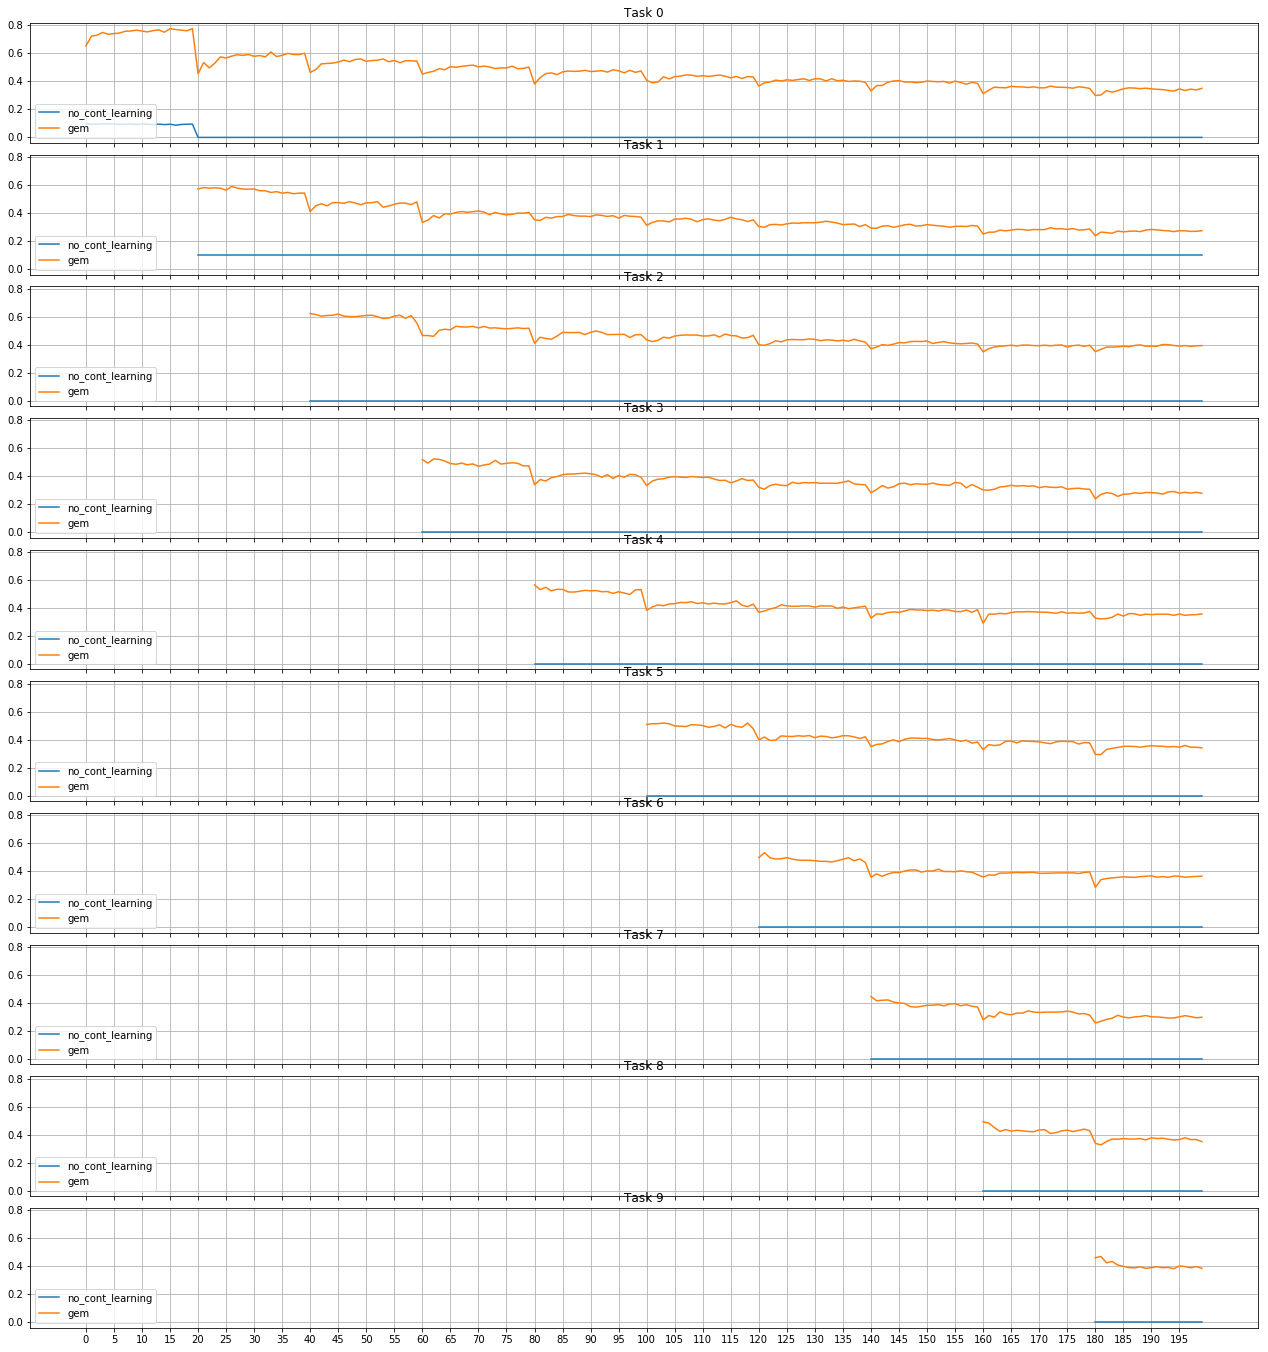

In [10]:
n_task = len(results[0][1]['tasks'])

tot_epochs = 0

for _, r in results:
    for k, v in r['tasks'].items():
        tot_epochs = max(tot_epochs, len(v['accuracy']))
      
fig, ax = plt.subplots(nrows=n_task, ncols=1, figsize=(22, 24), sharex=True, sharey=True)

for name, r in results:
    for i, task in enumerate(r['tasks'].keys()):

        com = r['tasks'][task]
        #no_ewt = metrics_no_ewt['tasks'][task]

        x = range(tot_epochs-len(com['accuracy']), tot_epochs)

        #ax = fig.add_subplot(n_task, 1, i+1, sharex=ax) 

        ax[i].plot(x, com['accuracy'], label=name)
        #ax.plot(x, no_ewt['accuracy'], label='online ewt')

        ax[i].set_xticks(range(0, tot_epochs, 5),minor=False)

        ax[i].set_title("Task {}".format(task))
        ax[i].legend(loc="lower left")
        ax[i].grid(True, axis='both')

        
fig.subplots_adjust(hspace=0.1, wspace=0.01)


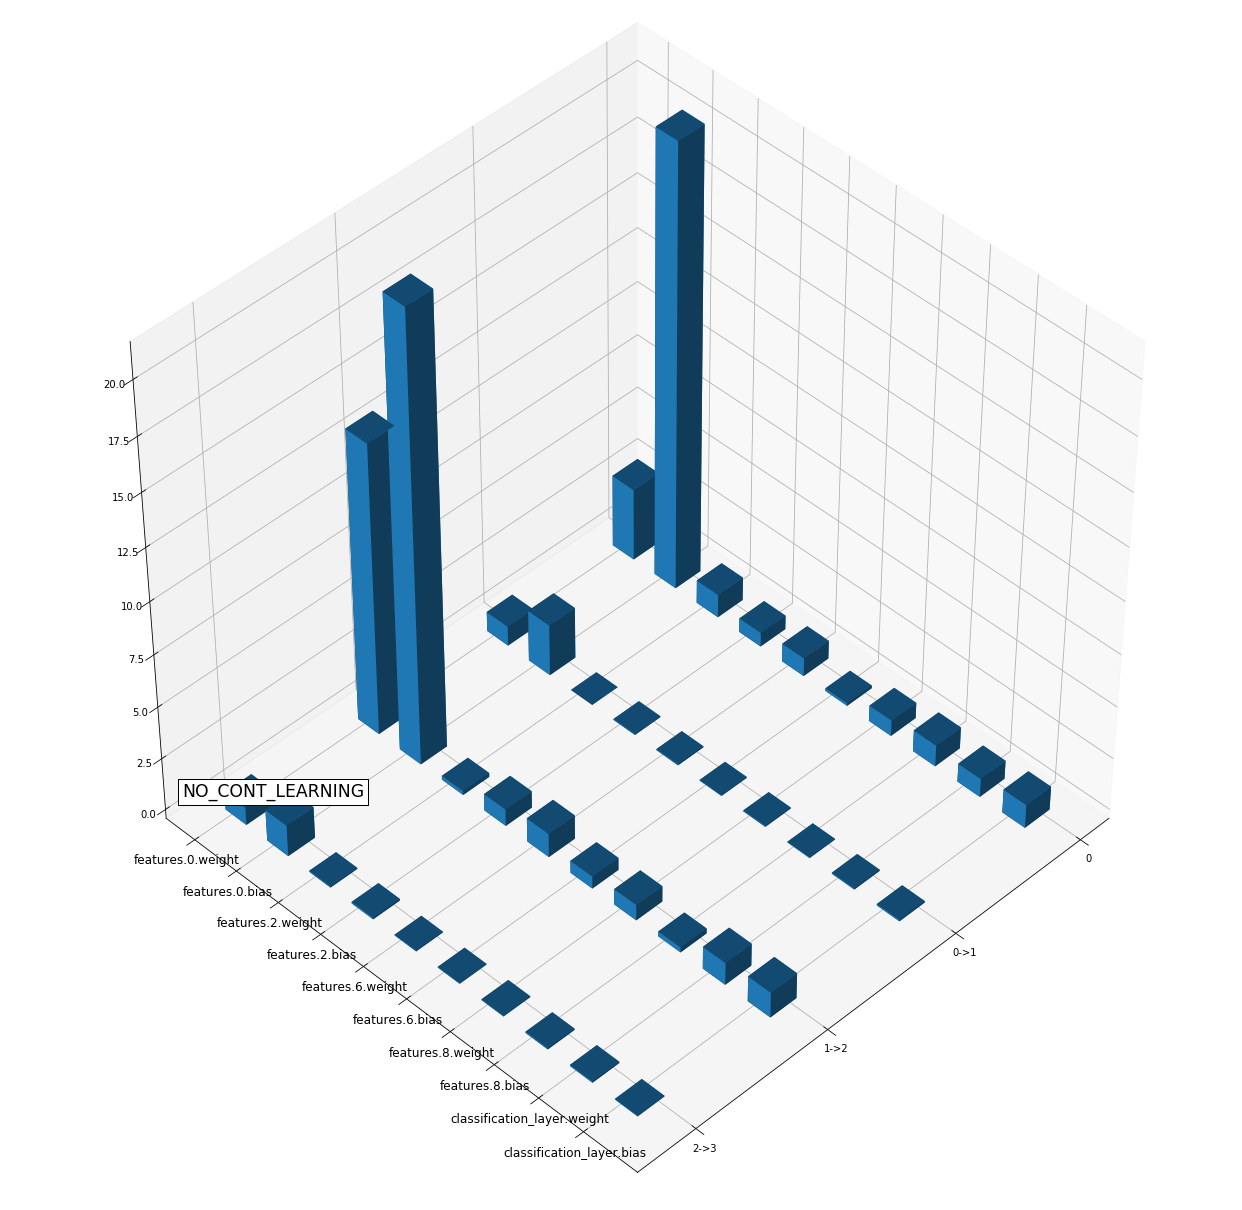

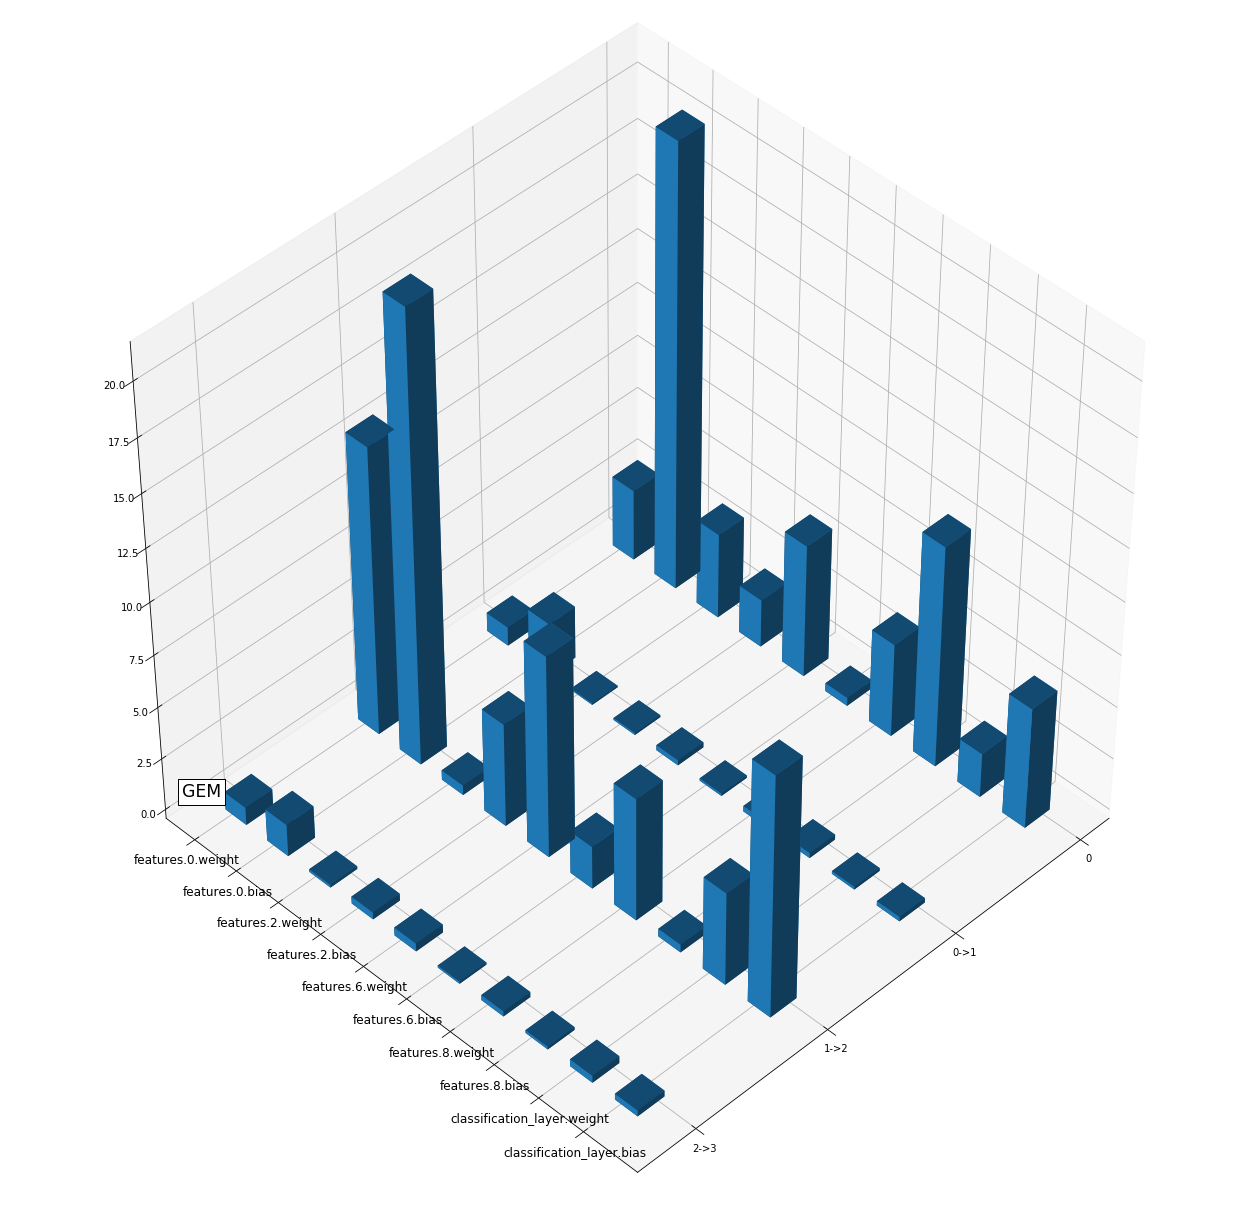

In [11]:
for name, tec in experiments:

    current_w = {n:p.cpu() for n, p in net.named_parameters() if p.requires_grad}

    x = np.arange(4)
    y = np.arange(len(current_w))
    
    xx, yy = np.meshgrid(x, y)
    z = np.zeros(shape=(len(x), len(y)))
    
    fig = plt.figure(figsize=(22, 22))
    ax = fig.add_subplot(111, projection='3d')
    
    x_labels = []
    
    for i in x:

        if i == 0:
            x_labels.append('0')
            
        else:
            x_labels.append('{}->{}'.format(i-1, i))
            
        n = deepcopy(net)
        c = deepcopy(config)

        c.MODEL_NAME = name

        if 'name' == 'gem':
            c.EWC_IMPORTANCE = 0.5

        c.EWC_TYPE = tec

        trainer = Trainer(n, deepcopy(dataset), c, save_modality=2)

        r = trainer.load(i)
        
        diff = {n: torch.dist(p.cpu(), current_w[n]) for n, p in trainer.model.named_parameters() if p.requires_grad }
        current_w = {n: p.cpu() for n, p in trainer.model.named_parameters() if p.requires_grad }
        
        for j, (_, d) in enumerate(diff.items()):
            z[i, j] = d
    

    z_n = z.flatten()

    ax.view_init(45, 45)
    
    ax.bar3d(xx.flatten(),
          yy.flatten(),
          np.zeros(len(z_n)),
          0.2, 0.5, z_n )
    
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    
    ax.set_yticks(y)
    ax.set_yticklabels(list(diff.keys()), fontdict={'fontsize':12})
    
    ax.text(3.5, 0, 2, name.upper(), color='black',  fontsize='xx-large', 
        bbox=dict(facecolor='white', edgecolor='black'))
    
    plt.show()

KeyError: 0

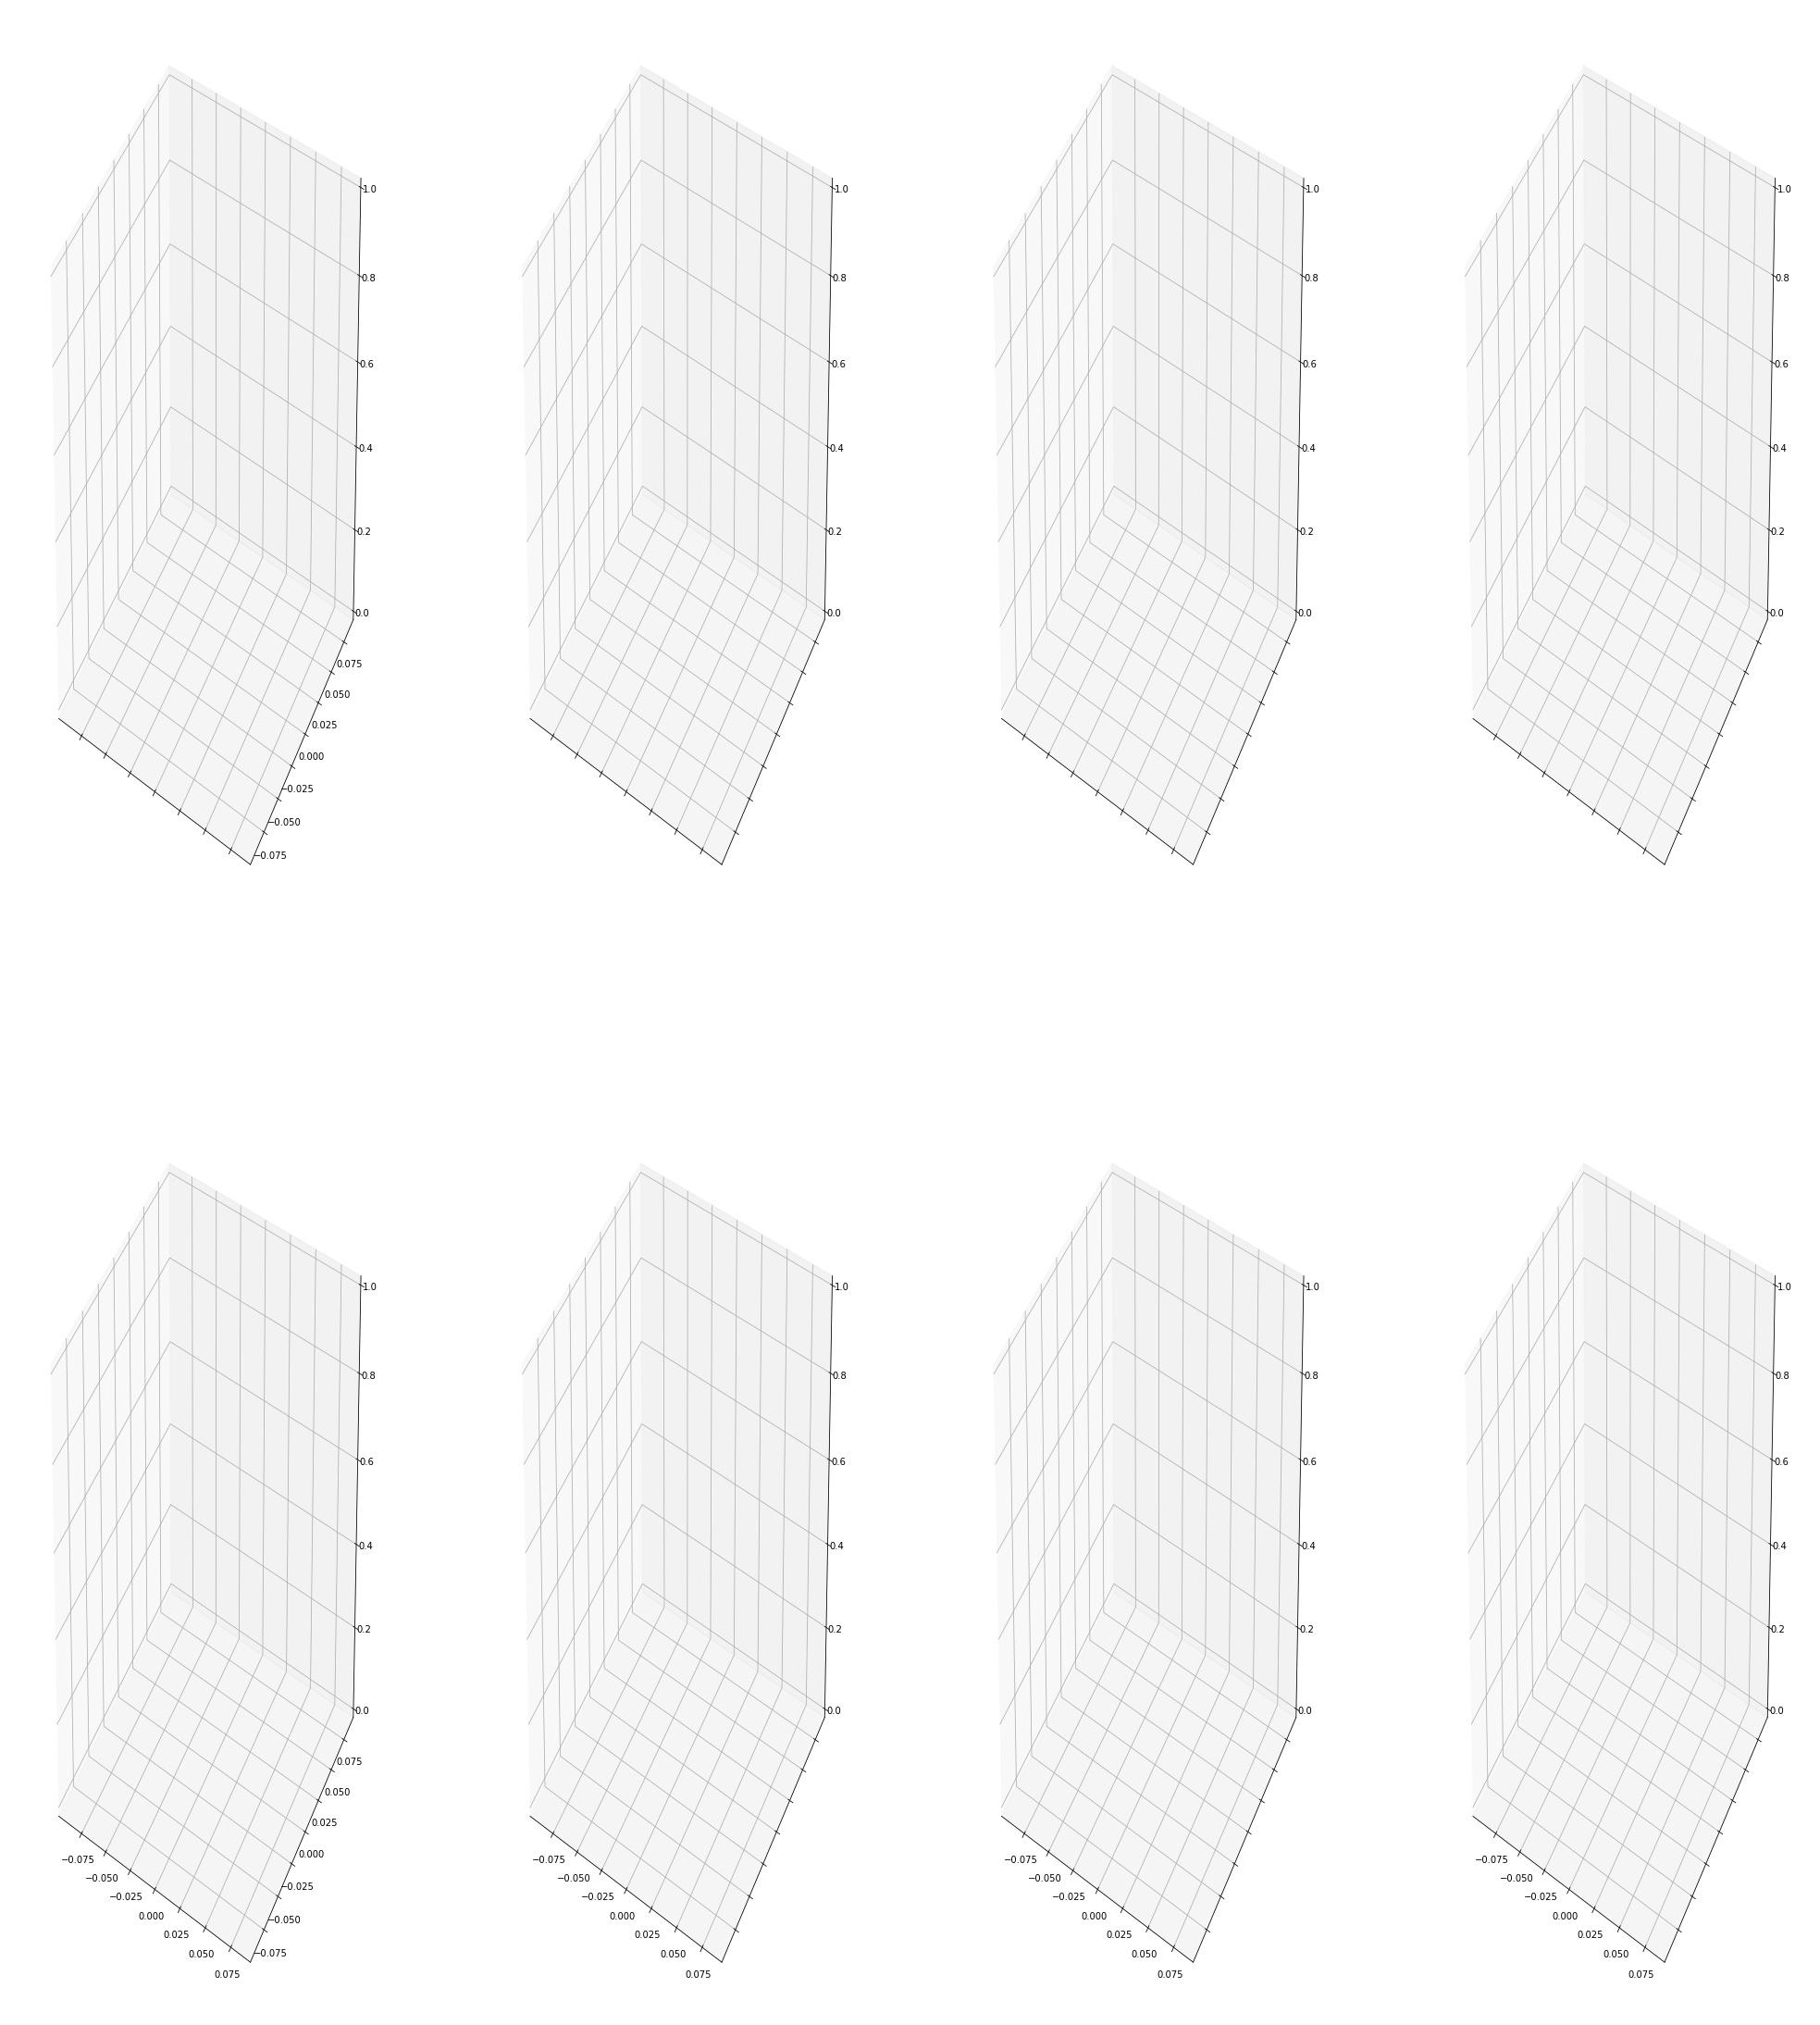

In [12]:
tot_epochs = 0

fig, ax = plt.subplots(nrows=len(experiments), ncols=4, figsize=(35, 40), 
                       sharex=True, sharey=True,  subplot_kw={'projection':'3d'})

for k in range(4):
    dataset.task = k
    
    images = []
    labels = []
    
    for im in range(len(dataset)):
        d = dataset[im]
        if d[1] in [0, 2, 9]: 
            images.append(d[0])
            labels.append(d[1].numpy()[0])
    colors = [int(i % 23) for i in labels]

    for i, (name, tec) in enumerate(experiments):

        tsne_model_en_2d = PCA(n_components=3, random_state=19)

        n = deepcopy(net)
        c = deepcopy(config)

        c.MODEL_NAME = name

        if 'name' == 'gem':
            config.EWC_IMPORTANCE = 0.5

        c.EWC_TYPE = tec

        trainer = Trainer(n, deepcopy(dataset), c, save_modality=2)

        r = trainer.load()

        with torch.no_grad():
            a = trainer.model.embedding(torch.stack(images, 0).to(config.DEVICE)).cpu().numpy()
            b = tsne_model_en_2d.fit_transform(a)

            ax[i][k].scatter(b[:, 0], b[:, 1], b[:, 2], c=colors)
            ax[i][k].set_title("{} embeddings on task: {}".format(name, k))
            
        del trainer
        del n
plt.show()